In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("New_Cars_Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         653 non-null    object 
 1   Types         653 non-null    object 
 2   Model         653 non-null    object 
 3   Transmission  653 non-null    object 
 4   Engine        653 non-null    int64  
 5   Seater        653 non-null    int64  
 6   Fuel_type     653 non-null    object 
 7   Price         653 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 40.9+ KB


In [68]:
df.describe()

,Engine,Seater,Price
count,653.000000,653.0,653.000000
mean,3040.058193,5.0,15.315636
std,7810.360165,0.0,6.899400
min,998.000000,5.0,5.070000
25%,1197.000000,5.0,9.850000
50%,1462.000000,5.0,14.250000
75%,1497.000000,5.0,19.480000
max,55000.000000,5.0,49.550000


# EDA 

In [33]:
df.Brand.value_counts()

Tata        198
Maruti      102
Hyundai      95
Mahindra     85
Kia          54
MG           50
Skoda        35
Nissan       13
Honda        12
Toyota        9
Name: Brand, dtype: int64

# Brand 

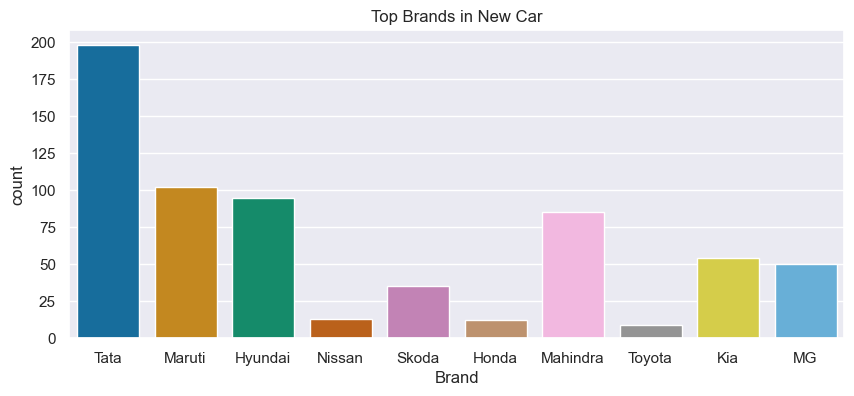

In [75]:
# Brands bar chart
plt.figure(figsize= (10,4))
plt.title("Top Brands in New Car")
plt.xlabel("Brands")
sns.countplot(x = df.Brand)
plt.show()



In [54]:
a = pd.DataFrame(df.Brand.value_counts())
a

,Brand
Tata,198
Maruti,102
Hyundai,95
Mahindra,85
Kia,54
MG,50
Skoda,35
Nissan,13
Honda,12
Toyota,9


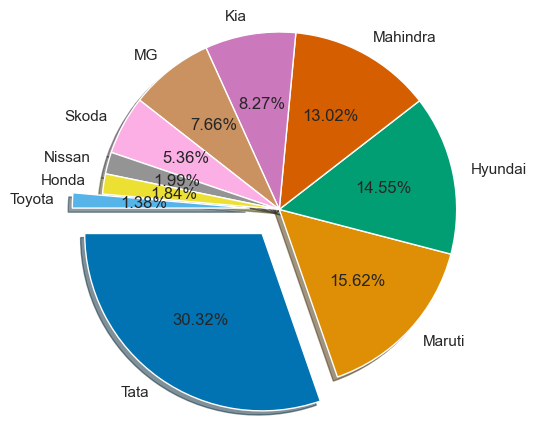

In [73]:
sns.set_theme(palette= "colorblind")
plt.pie(a["Brand"],labels = a.index,autopct = "%0.2f%%",shadow = True,radius = 1.2,explode = [0.2,0,0,0,0,0,0,0,0,0.2],startangle = 180)
plt.show()


# Types

In [69]:
df['Types'].describe()

count        653
unique        37
top       Suzuki
freq         102
Name: Types, dtype: object

In [83]:
a = df['Types'].value_counts().sort_values(ascending = False)
b = pd.DataFrame(a)
b


,Types
Suzuki,102
Nexon,61
Altroz,41
Punch,35
Scorpio-N,30
XUV700,29
Hector,27
Tiago,23
Tigor,19
Harrier,19


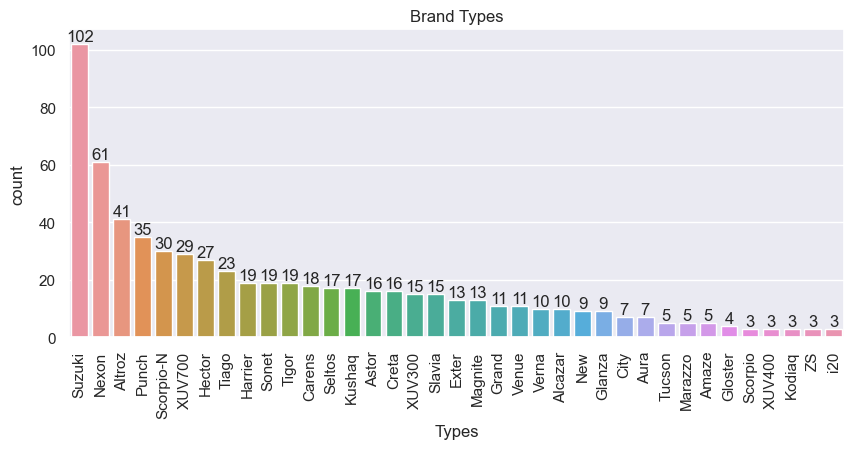

In [100]:
plt.figure(figsize = (10,4))
ax = sns.countplot(data= df,x ='Types',order=df['Types'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Brand Types")
ax.bar_label(ax.containers[0])
plt.show()

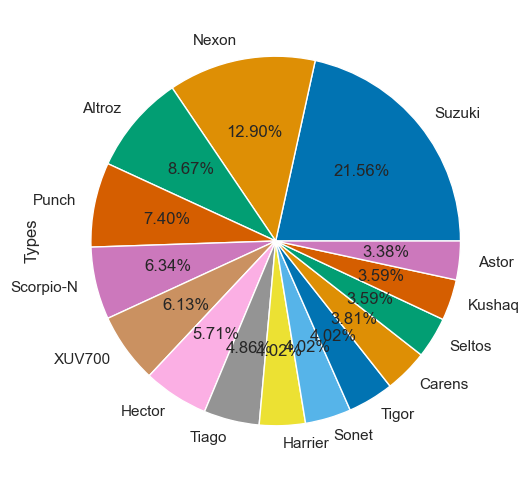

<Figure size 1000x500 with 0 Axes>

In [97]:
# Pie chart of Types
plt.figure(figsize = (10,6))

sns.set_theme(palette= "colorblind")
df.Types.value_counts()[:15].plot(kind = "pie",autopct = "%1.2f%%")
plt.figure(figsize= (10,5))
plt.show()


# Model

In [78]:
df.head(2)

,Brand,Types,Model,Transmission,Engine,Seater,Fuel_type,Price
0,Tata,Nexon,SUV,Manual,1497,5,Petrol,9.01
1,Tata,Nexon,SUV,Manual,1497,5,Petrol,10.06


In [77]:
df.Model.value_counts()

SUV            433
Hatchback      136
Sedan           76
MPV/MUV          5
Convertible      3
Name: Model, dtype: int64

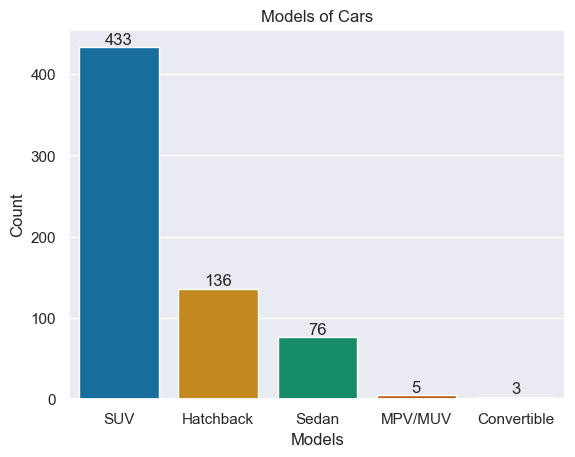

In [99]:
ax=sns.countplot(df,x = 'Model')
plt.xlabel("Models")
plt.ylabel("Count")
plt.title("Models of Cars")
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
b = pd.DataFrame(df.Model.value_counts())
b

,Model
SUV,433
Hatchback,136
Sedan,76
MPV/MUV,5
Convertible,3


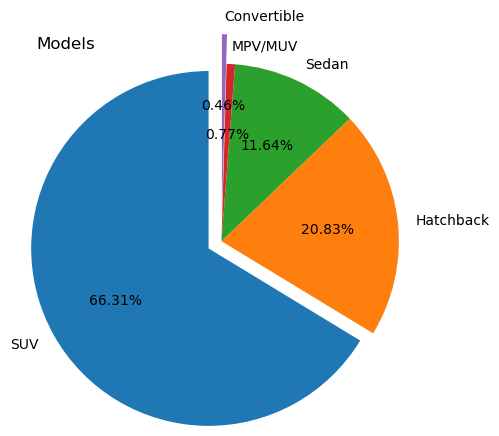

In [13]:
plt.pie(b['Model'],labels = b.index,autopct = "%0.2f%%",radius = 1.2,explode = [0.1,0,0,0,0.2],startangle =90)
plt.title("Models",loc = "left")
plt.show()


# Fuel Types

In [101]:
df.head(2)

,Brand,Types,Model,Transmission,Engine,Seater,Fuel_type,Price
0,Tata,Nexon,SUV,Manual,1497,5,Petrol,9.01
1,Tata,Nexon,SUV,Manual,1497,5,Petrol,10.06


In [110]:
df['Fuel_type'].value_counts()

Petrol      414
Diesel      154
CNG          55
Electric     30
Name: Fuel_type, dtype: int64

In [109]:
df['Fuel_type'].dtype

dtype('O')

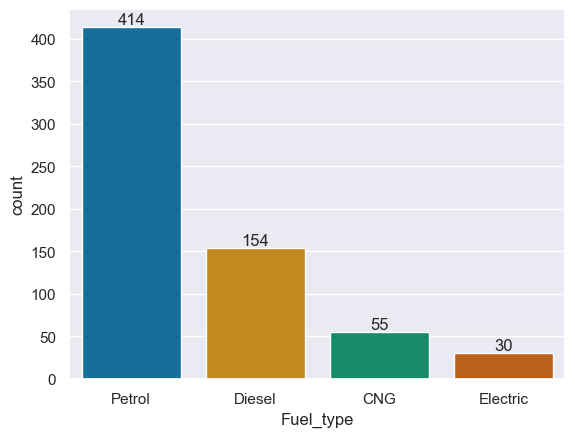

In [113]:
ax =sns.countplot(data = df,x = 'Fuel_type')
ax.bar_label(ax.containers[0])
plt.show()

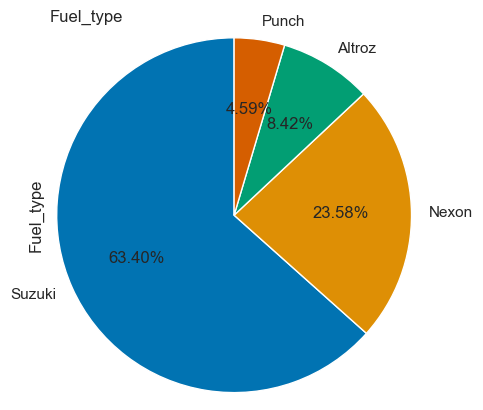

In [116]:
df['Fuel_type'].value_counts().plot(kind = 'pie',labels = b.index,autopct = "%0.2f%%",radius = 1.2,startangle =90)
plt.title("Fuel_type",loc = "left")
plt.show()


# Price Distribution 

In [126]:
import scipy.stats as ss
import scipy as s

In [129]:
np.mean(df['Price'])

15.315635528330782

In [130]:
np.median(df['Price'])

14.25

In [132]:
ss.skew(df['Price'])

1.3448197877020835

In [133]:
ss.kurtosis(df['Price'])

3.1941853674691174

In [119]:
df['Price']

0       9.01
1      10.06
2      10.72
3      10.78
4      11.16
       ...  
648    18.90
649    19.63
650    20.11
651    21.27
652    21.73
Name: Price, Length: 653, dtype: float64

<Figure size 700x300 with 0 Axes>

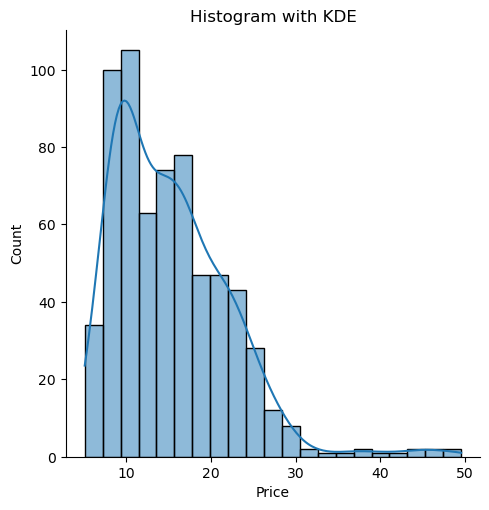

In [27]:
plt.figure(figsize=(7,3))
sns.displot(df['Price'],kde = True)
#plt.axvline(np.mean(df['Price']),color = 'r')
#plt.text(15.9,-3,'Mean')
#plt.axvline(np.median(df['Price']),color = 'g')
#plt.text(10,-4,'Median')
#plt.axvline(np.mode(df['Price'])[0],color = 'r')
plt.title("Histogram with KDE")
plt.show()

In [4]:
# Boxplot

In [29]:
a =np.percentile(df['Price'],[25,50,75])
q1 = a[0]
q2 = a[1]
q3 = a[2]
print('Quadrant-1',q1)
print('Quadrant-2',q2)
print('Quadrant-3',q3)

Quadrant-1 9.85
Quadrant-2 14.25
Quadrant-3 19.48


In [30]:
IQR = q3-q1
print('Inter_Quartile_Range',IQR)

Inter_Quartile_Range 9.63


In [31]:
lw = q1 - 1.5*IQR
hw = q3 + 1.5*IQR
print('whishker_low',lw)
print('whishker_high',hw)

whishker_low -4.595000000000001
whishker_high 33.925


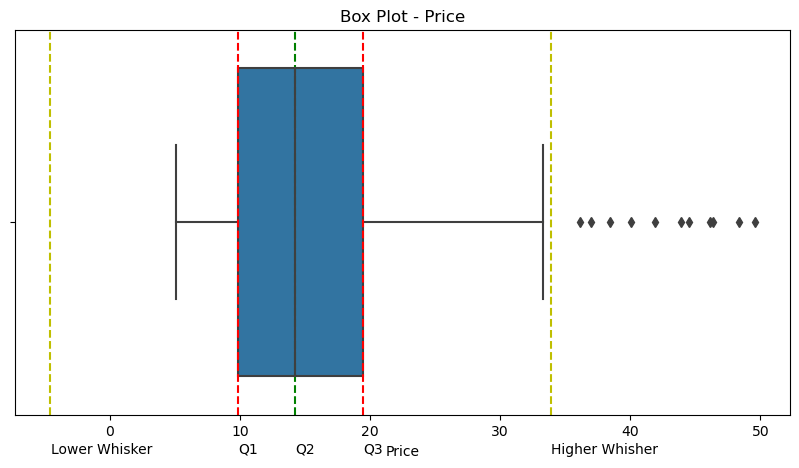

In [33]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = 'Price')
plt.axvline(q1,color ='r',linestyle='--')
plt.text(9.85,.6,'Q1')
plt.axvline(q2,color ='g',linestyle='--')
plt.text(14.25,.6,'Q2')
plt.axvline(q3,color ='r',linestyle='--')
plt.text(19.48,.6,'Q3')
plt.axvline(lw,color ='y',linestyle='--')
plt.text(-4.5,.6,'Lower Whisker')
plt.axvline(hw,color ='y',linestyle='--')
plt.text(33.92,.6,'Higher Whisher')
plt.title("Box Plot - Price")
plt.show()

In [10]:
df['Seater'] = df['Seater'].astype('object')

In [106]:
df['Fuel_type'] = df['Fuel_type'].astype('object')

In [107]:
df.describe(include = "all")

,Brand,Types,Model,Transmission,Engine,Seater,Fuel_type,Price
count,653,653,653,653,653.000000,653.0,653,653.000000
unique,10,37,5,2,NaN,NaN,4,NaN
top,Tata,Suzuki,SUV,Manual,NaN,NaN,Petrol,NaN
freq,198,102,433,401,NaN,NaN,414,NaN
mean,NaN,NaN,NaN,NaN,3040.058193,5.0,NaN,15.315636
std,NaN,NaN,NaN,NaN,7810.360165,0.0,NaN,6.899400
min,NaN,NaN,NaN,NaN,998.000000,5.0,NaN,5.070000
25%,NaN,NaN,NaN,NaN,1197.000000,5.0,NaN,9.850000
50%,NaN,NaN,NaN,NaN,1462.000000,5.0,NaN,14.250000
75%,NaN,NaN,NaN,NaN,1497.000000,5.0,NaN,19.480000


Univariate Analysis 
- Brand
- Model
- Brand Types
- Fuel_type

Distribution - box and distplot /kdeplot 
- Price

Bivariate Analysis
- Brand and price
- Fuel_type and price
- Model and price
- Engine and Variants

Mulitivariate Analysis - Stacked barplot and Mulitbarplot 
- Brand , Model and Price - Groupby
- Brand , Fuel_type and price

Correlation - heatmap and crosstab



In [38]:
df.groupby(['Brand','Model'])['Price'].mean()

Brand     Model      
Honda     Sedan          13.220000
Hyundai   Hatchback       9.886522
          SUV            17.526000
          Sedan          13.616471
Kia       SUV            16.830741
MG        SUV            23.300200
Mahindra  MPV/MUV        17.812000
          SUV            21.060500
Maruti    Hatchback       7.690250
          SUV            13.904565
          Sedan          10.619375
Nissan    SUV             9.735385
Skoda     SUV            22.634000
          Sedan          17.919333
Tata      Convertible    13.953333
          Hatchback       9.683281
          SUV            14.908870
          Sedan           8.884375
Toyota    Hatchback       9.831111
Name: Price, dtype: float64

In [34]:
df.describe()

,Engine,Seater,Price
count,653.000000,653.0,653.000000
mean,3040.058193,5.0,15.315636
std,7810.360165,0.0,6.899400
min,998.000000,5.0,5.070000
25%,1197.000000,5.0,9.850000
50%,1462.000000,5.0,14.250000
75%,1497.000000,5.0,19.480000
max,55000.000000,5.0,49.550000


# Engine

<Figure size 700x300 with 0 Axes>

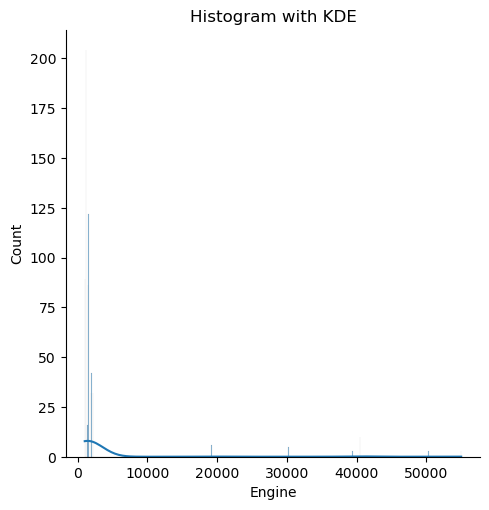

In [35]:
plt.figure(figsize=(7,3))
sns.displot(df['Engine'],kde = True)

plt.title("Histogram with KDE")
plt.show()

<Axes: ylabel='Frequency'>

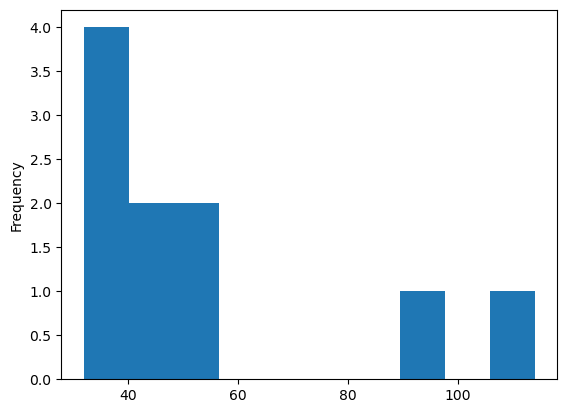

In [43]:
df['Engine'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'hist')